In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data
df = pd.read_csv('data.csv')
df.head(3)

In [ ]:
import math
df_rel = df[['Life expectancy ', 'GDP']]
data = df_rel.to_dict()
l = len(list(data['GDP'].values()))
for k in data:
    data[k] = list(data[k].values())
final_data = [(data['GDP'][i],data['Life expectancy '][i]) for i in range(l)]
data = final_data
data = [(x,y) for x,y in data if not math.isnan(x) and not math.isnan(y)]
print(len(data))
data[:4]

First, we'll do some basic statistics on this dataset to get an understanding for what we're working with.

In [ ]:
gdps = [x[0] for x in data]
les = [x[1] for x in data]
min_gdp = min(gdps)
max_gdp = max(gdps)
min_le = min(les)
max_le = max(les)
avg_gdp = sum(gdps)/len(gdps)
avg_le = sum(les)/len(les)
print(f'Basic Statistics\n- [GDP] min: {min_gdp}; max: {max_gdp}; avg: {avg_gdp}')
print(f'- [LE] min: {min_le}; max: {max_le}; avg: {avg_le}')

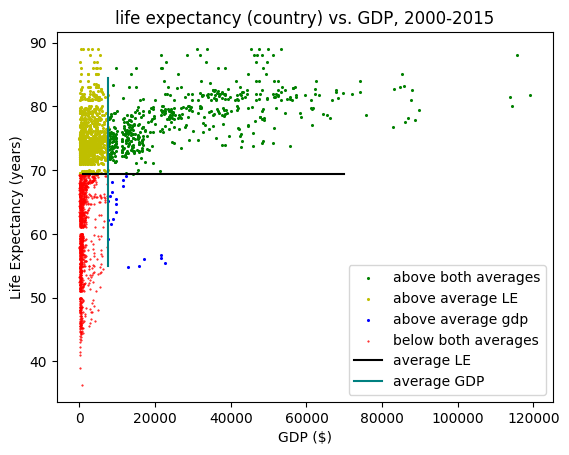

In [62]:
from plot import Plot
p = Plot()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp]),label='below both averages',
                    scatterArgs={'s':0.25,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.plot([])
plt.legend()
p._showPlt()

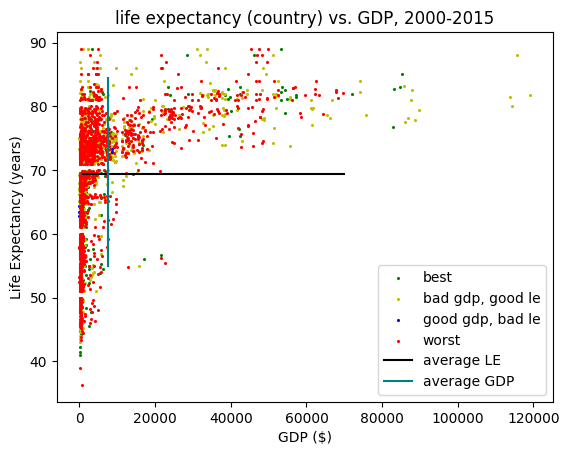

In [68]:
cat1 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] < avg_le]
cat2 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] >= avg_le]
cat3 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] < avg_le]
cat4 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] >= avg_le]

def _extract(idxs,arr):
       out = []
       for i in idxs:
              out.append(arr[i])
       return out

def extract(idxs,*arrs):
       out = []
       for _,a in enumerate(*arrs):
              out.append(_extract(idxs,a))
       return tuple(out)

def _extract_category(predictions,cat_num):
       return [i for i,x in enumerate(predictions) if x == cat_num]

def extract_categories(predictions):
       out = []
       for cat_num in range(1,5):
              out.append(_extract_category(predictions,cat_num))
       for i in range(len(out)):
              out[i] = extract(out[i],[gdps,les])
       return out

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
n = KNeighborsClassifier(n_neighbors=3)
categories = [1,2,3,4]
y = []
cats = [cat1,cat2,cat3,cat4]
for i,cat in enumerate(cats):
    for c in cat:
        y.append(i+1)
y = np.array(y)
X = np.array(list(zip(gdps,les)))
classifier = n.fit(X,y)
predictions = classifier.predict(X)
cats = extract_categories(predictions)
colors = ['g','y','b','r']
p.plotGeneric(data=cats[3],label='best',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[1],label='bad gdp, good le',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[2],label='good gdp, bad le',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=cats[0],label='worst',
                    scatterArgs={'s':1.5,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
# plt.plot([])
plt.legend()
p._showPlt()


In [ ]:
!pip3 install scikit-learn

2485

In [60]:
predictions

array([1, 1, 1, ..., 2, 1, 1])

In [ ]:
#todo: knn, other clustering